####
1. How often do men go to hospitals compared to women? Which of them is more likely to show up?
2. Does recieving an SMS as a reminder affect whether or not a patient may show up? is it correlated with number of days before the appointment?
3. Does having a scholarship affects showing up on a hospital appointment? What are the age groups affected by this?
4. Does having certain deseases affect whather or not a patient may show up to their appointment? is it affected by gender?

In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [130]:
med = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

In [131]:
med.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [133]:
med.shape

(110527, 14)

In [136]:
med.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


### Data Cleaning

In [139]:
#no null values in dataset
med.isna().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [141]:
#no duplicate values
med.duplicated().sum()

0

#### Cleaning Diseases Columns

In [144]:
med['Hipertension'] = med['Hipertension'].map({1:'diagnosed', 0:'not diagnosed'})

In [146]:
med['Diabetes'] = med['Diabetes'].map({1:'diagnosed', 0:'not diagnosed'})
med['Alcoholism'] = med['Alcoholism'].map({1:'diagnosed', 0:'not diagnosed'})
med['Handcap'] = med['Handcap'].map({1:'diagnosed', 0:'not diagnosed'})

In [148]:
med['SMS_received'] = med['SMS_received'].map({1:'yes', 0:'no'})
med['Scholarship'] = med['Scholarship'].map({1:'yes', 0:'no'})

In [150]:
med.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,no,diagnosed,not diagnosed,not diagnosed,not diagnosed,no,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,no,not diagnosed,not diagnosed,not diagnosed,not diagnosed,no,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,no,not diagnosed,not diagnosed,not diagnosed,not diagnosed,no,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,no,not diagnosed,not diagnosed,not diagnosed,not diagnosed,no,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,no,diagnosed,diagnosed,not diagnosed,not diagnosed,no,No


#### Cleaning Date Columns

In [153]:
med['ScheduledDay'] = pd.to_datetime(med['ScheduledDay'])
med['ScheduledDay'] = med['ScheduledDay'].dt.date

In [154]:
med['AppointmentDay'] = pd.to_datetime(med['AppointmentDay'])
med['AppointmentDay'] = med['AppointmentDay'].dt.date
med.head()                                     

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,no,diagnosed,not diagnosed,not diagnosed,not diagnosed,no,No
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,no,not diagnosed,not diagnosed,not diagnosed,not diagnosed,no,No
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,no,not diagnosed,not diagnosed,not diagnosed,not diagnosed,no,No
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,no,not diagnosed,not diagnosed,not diagnosed,not diagnosed,no,No
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,no,diagnosed,diagnosed,not diagnosed,not diagnosed,no,No


#### Age Column had negative value

In [158]:
med.drop(med[med['Age']<0].index, inplace=True)

In [160]:
med['Age'].value_counts()

Age
0      3539
1      2273
52     1746
49     1652
53     1651
       ... 
98        6
115       5
100       4
102       2
99        1
Name: count, Length: 103, dtype: int64

#### Done Appointments

In [163]:
med['AppointmentDay'] = pd.to_datetime(med['AppointmentDay'])
med['ScheduledDay'] = pd.to_datetime(med['ScheduledDay'])
med['due days'] = (med['AppointmentDay']-med['ScheduledDay']).dt.days

In [165]:
med.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,due days
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,no,diagnosed,not diagnosed,not diagnosed,not diagnosed,no,No,0
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,no,not diagnosed,not diagnosed,not diagnosed,not diagnosed,no,No,0
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,no,not diagnosed,not diagnosed,not diagnosed,not diagnosed,no,No,0
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,no,not diagnosed,not diagnosed,not diagnosed,not diagnosed,no,No,0
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,no,diagnosed,diagnosed,not diagnosed,not diagnosed,no,No,0


In [167]:
med['due days'].unique()

array([  0,   2,   3,   1,   4,   9,  29,  10,  23,  11,  18,  17,  14,
        28,  24,  21,  15,  16,  22,  43,  30,  31,  42,  32,  56,  45,
        46,  39,  37,  38,  44,  50,  60,  52,  53,  65,  67,  91,  66,
        84,  78,  87, 115, 109,  63,  70,  72,  57,  58,  51,  59,  41,
        49,  73,  64,  20,  33,  34,   6,  35,  36,  12,  13,  40,  47,
         8,   5,   7,  25,  26,  48,  27,  19,  61,  55,  62, 176,  54,
        77,  69,  83,  76,  89,  81, 103,  79,  68,  75,  85, 112,  -1,
        80,  86,  98,  94, 142, 155, 162, 169, 104, 133, 125,  96,  88,
        90, 151, 126, 127, 111, 119,  74,  71,  82, 108, 110, 102, 122,
       101, 105,  92,  97,  93, 107,  95,  -6, 139, 132, 179, 117, 146,
       123])

In [169]:
#drop negative values
med.drop(med[med['due days']<1].index, inplace=True)

In [171]:
med['due days'].describe()

count    71959.000000
mean        15.642018
std         16.494334
min          1.000000
25%          4.000000
50%          9.000000
75%         22.000000
max        179.000000
Name: due days, dtype: float64

In [173]:
med.info()

<class 'pandas.core.frame.DataFrame'>
Index: 71959 entries, 5 to 110526
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   PatientId       71959 non-null  float64       
 1   AppointmentID   71959 non-null  int64         
 2   Gender          71959 non-null  object        
 3   ScheduledDay    71959 non-null  datetime64[ns]
 4   AppointmentDay  71959 non-null  datetime64[ns]
 5   Age             71959 non-null  int64         
 6   Neighbourhood   71959 non-null  object        
 7   Scholarship     71959 non-null  object        
 8   Hipertension    71959 non-null  object        
 9   Diabetes        71959 non-null  object        
 10  Alcoholism      71959 non-null  object        
 11  Handcap         71837 non-null  object        
 12  SMS_received    71959 non-null  object        
 13  No-show         71959 non-null  object        
 14  due days        71959 non-null  int64         
dtypes: dat

#### Drop Unnecessary Columns

In [176]:
med.drop(columns=['AppointmentID'], axis=1, inplace=True)

In [195]:
#dropping duplicates to treate patientId as a unique id.
med.drop_duplicates(subset=['PatientId'], keep='first', inplace=True)

In [197]:
med['PatientId'].nunique()

45840

In [201]:
med.shape

(45840, 14)

####
1. How often do men go to hospitals compared to women? Which of them is more likely to show up?
2. Does recieving an SMS as a reminder affect whether or not a patient may show up? is it correlated with number of days before the appointment?
3. Does having a scholarship affects showing up on a hospital appointment? What are the age groups affected by this?
4. Does having certain deseases affect whather or not a patient may show up to their appointment? is it affected by gender?

### Exploratory Data

In [205]:
med.head()

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,due days
5,9.598513e+13,F,2016-04-27,2016-04-29,76,REPÚBLICA,no,diagnosed,not diagnosed,not diagnosed,not diagnosed,no,No,2
6,7.336882e+14,F,2016-04-27,2016-04-29,23,GOIABEIRAS,no,not diagnosed,not diagnosed,not diagnosed,not diagnosed,no,Yes,2
7,3.449833e+12,F,2016-04-27,2016-04-29,39,GOIABEIRAS,no,not diagnosed,not diagnosed,not diagnosed,not diagnosed,no,Yes,2
9,7.812456e+13,F,2016-04-27,2016-04-29,19,CONQUISTA,no,not diagnosed,not diagnosed,not diagnosed,not diagnosed,no,No,2
10,7.345362e+14,F,2016-04-27,2016-04-29,30,NOVA PALESTINA,no,not diagnosed,not diagnosed,not diagnosed,not diagnosed,no,No,2


#### 1. How often do men go to hospitals compared to women? Which of them is more likely to show up?
Women go to hospitals more than men. Women are more likely to show up to an appointment as 71.58% of total women who had appointments showed up while 70.96% of men who has appointments 

In [327]:
gender_count = med.groupby('Gender')['PatientId'].count()
gender_count

Gender
F    30058
M    15782
Name: PatientId, dtype: int64

In [252]:
med.groupby(['Gender','No-show'])['PatientId'].count()

Gender  No-show
F       No         21517
        Yes         8541
M       No         11199
        Yes         4583
Name: PatientId, dtype: int64

In [254]:
#total number of women and men that showed up
total_women = med[med['Gender']=='F']['PatientId'].count()
total_men =  med[med['Gender']=='M']['PatientId'].count()
total_women, total_men

(30058, 15782)

In [256]:
yes_women = med[(med['No-show']=='Yes') & (med['Gender']=='F')]['PatientId'].count()
yes_men = med[(med['No-show']=='Yes') & (med['Gender']=='M')]['PatientId'].count()

In [286]:
#percentage of women to show up
percent_women = round((yes_women/total_women) * 100, 2)

#percentage of men to show up
percent_men = round((yes_men/total_men) * 100, 2)

print("Percent of women who did not show up:", percent_women, "%")
print("Percent of men who did not show up:", percent_men, "%")

Percent of women who did not show up: 28.42 %
Percent of men who did not show up: 29.04 %


In [294]:
no_women = med[(med['No-show']=='No') & (med['Gender']=='F')]['PatientId'].count()
no_men = med[(med['No-show']=='No') & (med['Gender']=='M')]['PatientId'].count()

#percentage of women to show up
percentno_women = round((no_women/total_women) * 100, 2)

#percentage of men to show up
percentno_men = round((no_men/total_men) * 100, 2)

print("Percent of women who show up:", percentno_women, "%")
print("Percent of men who show up:", percentno_men, "%")

Percent of women who show up: 71.58 %
Percent of men who show up: 70.96 %


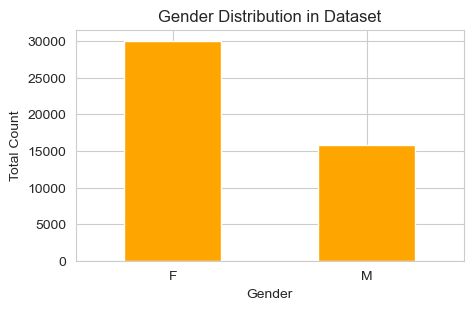

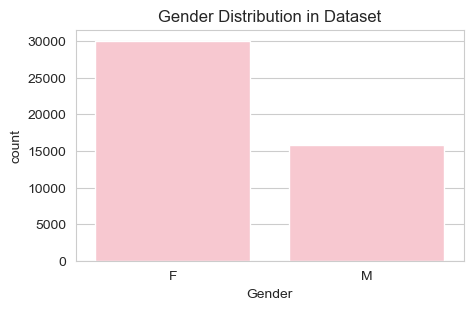

In [318]:
#bar graph to show how often do men go to hospitals compared to women (simple count plot)
plt.figure(figsize=(5,3))
gender_count.plot(kind='bar', color='orange', grid=True)
plt.title('Gender Distribution in Dataset')
plt.xlabel('Gender')
plt.ylabel('Total Count')
plt.xticks(rotation=360)
plt.show()

#can also do this in seaborn
plt.figure(figsize=(5,3))
sns.set_style("whitegrid")
sns.countplot(x='Gender', data=med, color='pink')
plt.title('Gender Distribution in Dataset')
plt.show()

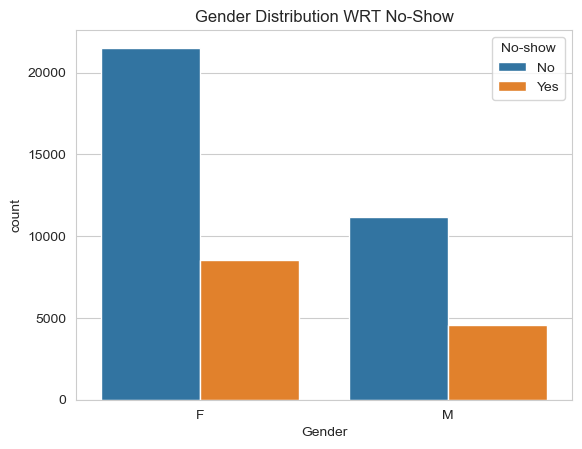

In [290]:
#distribution plot of No-Show
sns.set_style("whitegrid") 
sns.countplot(x='Gender', data=med, hue='No-show')
plt.title('Gender Distribution WRT No-Show')
plt.show()